
🔍 Threshold Points (Area <= 4350000, PDP <= 880, PSNR >= 32):

       Area         PDP       PSNR Label
13  4320676  844.586960  32.175473  set1
18  4322838  848.113421  32.385263  set1
37  4330031  840.085334  34.004110  set1
38  4321618  845.791158  33.644387  set2
39  4331618  846.791158  34.644387  set2

📈 Percentage Increase over First Raw Config (used as reference):
• Point 13: Area ↑ -33.15%, PDP ↑ -23.25%, PSNR ↑ -28.50%
• Point 18: Area ↑ -33.12%, PDP ↑ -22.93%, PSNR ↑ -28.03%
• Point 37: Area ↑ -33.01%, PDP ↑ -23.66%, PSNR ↑ -24.44%
• Point 38: Area ↑ -33.14%, PDP ↑ -23.14%, PSNR ↑ -25.23%
• Point 39: Area ↑ -32.98%, PDP ↑ -23.05%, PSNR ↑ -23.01%


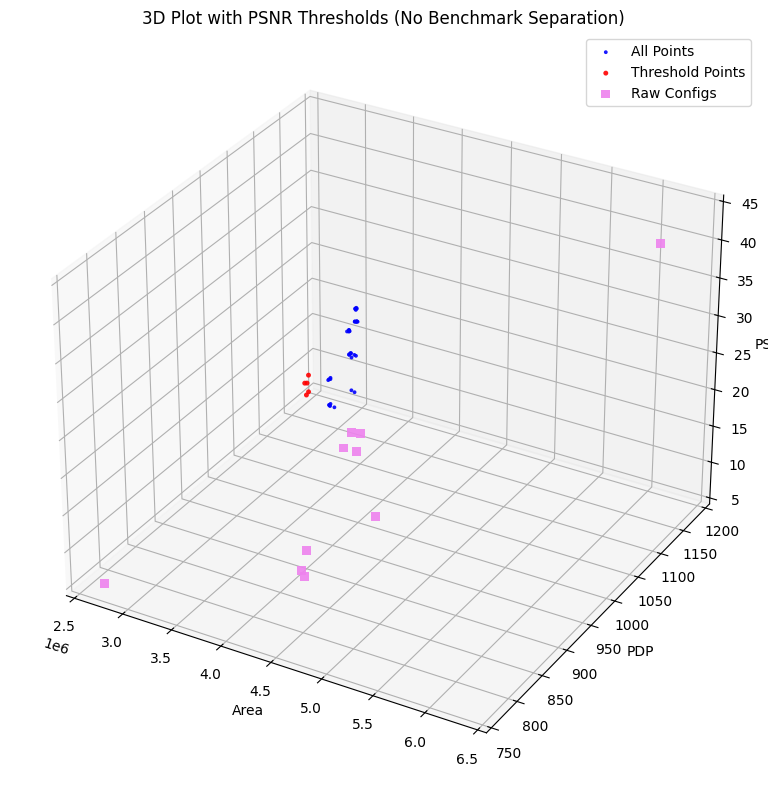

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ---------------- Load and Combine Main CSVs ----------------
csv_files = [
    "Composite_plot_psnr/CSV_pareto_64_psnr.csv",
    "Composite_plot_psnr/CSV_pareto_128_psnr.csv",
    "Composite_plot_psnr/CSV_pareto_256_psnr.csv",
    "Composite_plot_psnr/CSV_pareto_512_psnr.csv"
]

# Load and combine all Pareto CSVs
df_list = [pd.read_csv(file) for file in csv_files]
df = pd.concat(df_list, ignore_index=True)

# ✅ Load raw config CSV
raw_config_csv = "Composite_plot_psnr/raw_config_psnr.csv"  # Replace with your actual filename
raw_df = pd.read_csv(raw_config_csv)

# ---------------- Validate Columns ----------------
required_columns = ['Area', 'PDP', 'PSNR']
for data, name in [(df, "combined CSVs"), (raw_df, "raw config CSV")]:
    if not all(col in data.columns for col in required_columns):
        raise ValueError(f"{name} must contain the columns: {required_columns}")

# ---------------- Plotting Setup ----------------
area_range = (2500000, 6500000)
pdp_range = (750, 1200)
psnr_range = (5, 45)

def plot_with_thresholds(x_thresh, y_thresh, z_thresh):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Threshold points from main CSV
    in_thresh = df[
        (df['Area'] <= x_thresh) &
        (df['PDP'] <= y_thresh) &
        (df['PSNR'] >= z_thresh)
    ]

    print("\n🔍 Threshold Points (Area <= {}, PDP <= {}, PSNR >= {}):\n".format(
        x_thresh, y_thresh, z_thresh
    ))
    print(in_thresh)

    # ---------------- Percentage Increases ----------------
    print("\n📈 Percentage Increase over First Raw Config (used as reference):")
    benchmark = raw_df.iloc[0]
    for i, row in in_thresh.iterrows():
        area_inc = ((row['Area'] - benchmark['Area']) / benchmark['Area']) * 100
        pdp_inc = ((row['PDP'] - benchmark['PDP']) / benchmark['PDP']) * 100
        psnr_inc = ((row['PSNR'] - benchmark['PSNR']) / benchmark['PSNR']) * 100

        print(f"• Point {i}: Area ↑ {area_inc:.2f}%, PDP ↑ {pdp_inc:.2f}%, PSNR ↑ {psnr_inc:.2f}%")

    # All other points from main CSV
    out_thresh = df.drop(in_thresh.index)

    # Plot out-threshold points in blue
    ax.scatter(out_thresh['Area'], out_thresh['PDP'], out_thresh['PSNR'],
               c='blue', marker='.', s=30, label='All Points',
               alpha=0.9, edgecolor='none')

    # Plot threshold points in red
    if not in_thresh.empty:
        ax.scatter(in_thresh['Area'], in_thresh['PDP'], in_thresh['PSNR'],
                   c='red', marker='.', s=50, label='Threshold Points',
                   alpha=0.9, edgecolor='none')

    # ✅ Plot all raw configs (including benchmark) in violet
    ax.scatter(raw_df['Area'], raw_df['PDP'], raw_df['PSNR'],
               c='#EE82EE', marker='s', s=40, label='Raw Configs',
               alpha=0.9, edgecolor='none')

    # Set axis ranges
    ax.set_xlim(area_range)
    ax.set_ylim(pdp_range)
    ax.set_zlim(psnr_range)

    # Labels and title
    ax.set_xlabel('Area')
    ax.set_ylabel('PDP')
    ax.set_zlabel('PSNR')
    ax.set_title('3D Plot with PSNR Thresholds (No Benchmark Separation)')
    ax.legend()
    plt.tight_layout()
    plt.show()

# ---------------- Run the Plot ----------------
plot_with_thresholds(x_thresh=4350000, y_thresh=880, z_thresh=32)
